# Overwiew

## Summary

In [90]:
import pandas as pd

df = pd.read_csv("data.csv", delimiter=",")
df

,id,gender,customer_senior,customer_partner,dependent_family,month_tenure,phone_subscription,multiple_line,internet_type,online_security,...,device_protection_plan,techinal_support,streaming_tv,streaming_movie,contract_type,paperless_billing,payment_method_type,amount_charges_monthly,amount_total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7043 non-null   object 
 1   gender                  7043 non-null   object 
 2   customer_senior         7043 non-null   int64  
 3   customer_partner        7043 non-null   object 
 4   dependent_family        7043 non-null   object 
 5   month_tenure            7043 non-null   int64  
 6   phone_subscription      7043 non-null   object 
 7   multiple_line           7043 non-null   object 
 8   internet_type           7043 non-null   object 
 9   online_security         7043 non-null   object 
 10  backup_service_online   7043 non-null   object 
 11  device_protection_plan  7043 non-null   object 
 12  techinal_support        7043 non-null   object 
 13  streaming_tv            7043 non-null   object 
 14  streaming_movie         7043 non-null   

## Duplicates

In [92]:
# Check for duplicates in ID
duplicates = df["id"].duplicated().any()
duplicates

False

## Missing values

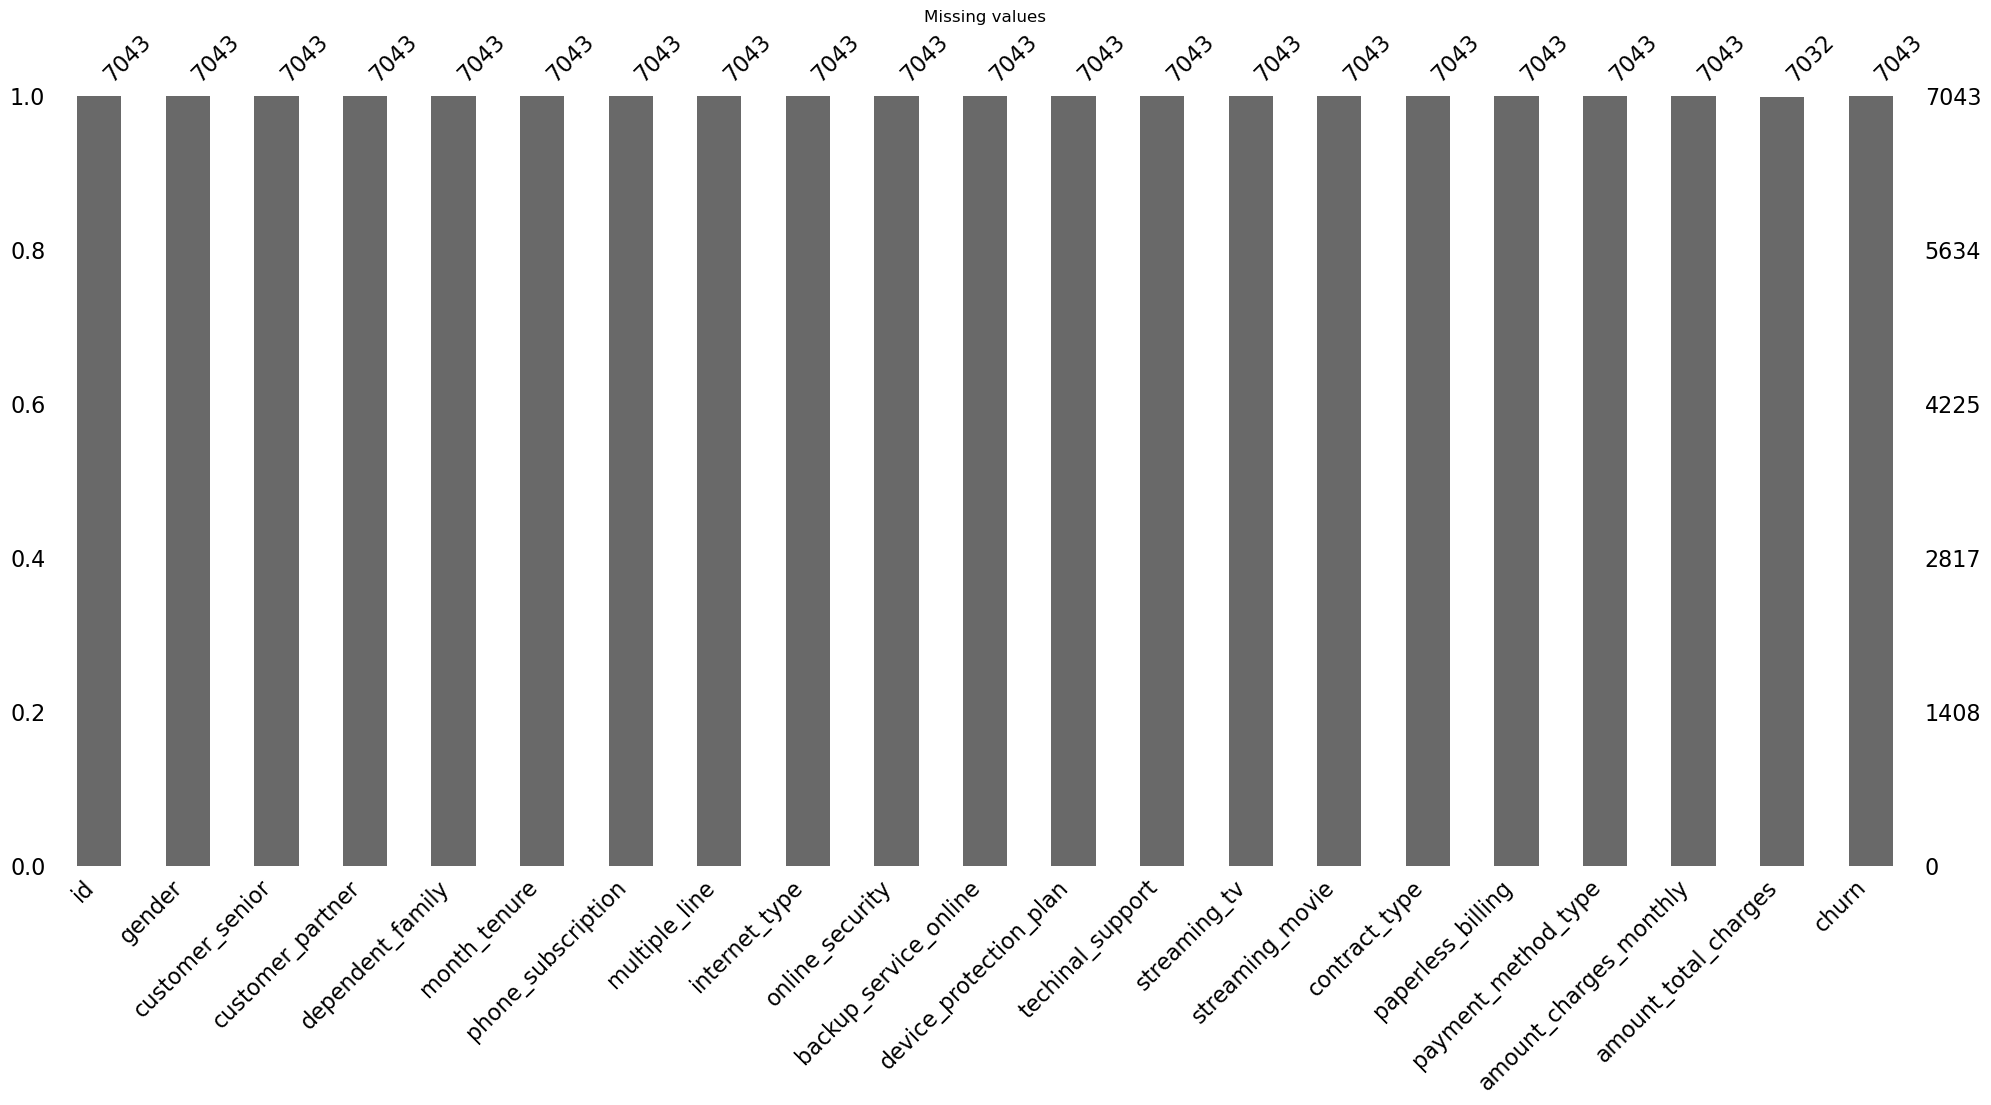

In [93]:
# Check for missing values
import missingno as msno
import matplotlib.pyplot as plt 

msno.bar(df)
plt.title("Missing values")
plt.show()

## Feature distributions

Defining the column lists

In [147]:
import numpy as np

df_shorten = df.drop(columns=["id", "churn"])
df_shorten = df_shorten.astype({"customer_senior": "object"})

cat_columns = [col for col in df_shorten.select_dtypes(include=np.object_).columns][1:-1]
num_columns = [col for col in df_shorten.select_dtypes(include=[np.int64, np.float64]).columns]
print(f"Total features: {len(df_shorten.columns)}\nCategorical features: {len(cat_columns)}\nNumerical features: {len(num_columns)}\n`id` and `churn` are excluded from these lists.")

Total features: 17
Categorical features: 12
Numerical features: 3
`id` and `churn` are excluded from these lists.


### Mapping

In [115]:
mapping_dict = {
    "gender": {
        "Male": 1,
        "Female": 0
    },
    "customer_senior": {
        1: 1,
        0: 0
    },
    "internet_type": {
        "Fiber optic": 2,
        "DSL": 1,
        "No": 0
    },
    "contract_type": {
        "Two year": 2,
        "One year": 1,
        "Month-to-month": 0
    },
    "payment_method_type": {
        "Electronic check": 3,
        "Mailed check": 2,
        "Bank transfer (automatic)": 1,
        "Credit card (automatic)": 0
    },
    "multiple_line" : {
        "Yes": 2,
        "No": 1,
        "No phone service": 0
    },
    "binary": {
        "Yes": 1,
        "No": 0
    },
    "multiple" : {
        "Yes": 2,
        "No": 1,
        "No internet service": 0
    }
}

In [116]:
df_mapped = df.copy()

for col in df_mapped:
    if col in mapping_dict.keys():
        df_mapped[col] = df_mapped[col].map(mapping_dict[col])
    else:
        if df_mapped[col].nunique() == 2:
            df_mapped[col] = df_mapped[col].map(mapping_dict["binary"])
        elif df_mapped[col].nunique() == 3:
            df_mapped[col] = df_mapped[col].map(mapping_dict["multiple"])

df_mapped

,id,gender,customer_senior,customer_partner,dependent_family,month_tenure,phone_subscription,multiple_line,internet_type,online_security,...,device_protection_plan,techinal_support,streaming_tv,streaming_movie,contract_type,paperless_billing,payment_method_type,amount_charges_monthly,amount_total_charges,churn
0,7590-VHVEG,0,0,1,0,1,0,0,2,1,...,1,1,1,1,0,1,3,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,1,2,2,...,2,1,1,1,1,0,2,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,1,2,2,...,1,1,1,1,0,1,2,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,2,2,...,2,2,1,1,1,0,1,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,1,1,1,...,1,1,1,1,0,1,3,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,2,2,...,2,2,2,2,1,1,2,84.80,1990.50,0
7039,2234-XADUH,0,0,1,1,72,1,2,1,1,...,2,1,2,2,1,1,0,103.20,7362.90,0
7040,4801-JZAZL,0,0,1,1,11,0,0,2,2,...,1,1,1,1,0,1,3,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,2,1,1,...,1,1,1,1,0,1,2,74.40,306.60,1


### Correlation matrix

In [ ]:
import plotly.graph_objects as go 
from plotly.subplots import make_subplots

cor_matrix = df_mapped.drop(columns='id').corr().round(2)

fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"type": "heatmap"}]])

fig.add_trace(go.Heatmap(z=cor_matrix.values, x=cor_matrix.columns, y=cor_matrix.columns, colorscale='Viridis'), row=1, col=1)

fig.update_layout(title='Correlation Matrix', width=700, height=700, template="plotly_dark")
fig.show()

**Some coments on the correlation matrix :**

> *Some correlations are hard to interpret because of the categorical variables, but still it helps us to understand the link between the variables and to highlit them.*

- `streaming_movie` and `streaming_tv`: strong positive correlation (0.81), the kind of service is the same. We could assume that having access to one of those services implies having access to the other one.
- all the features related to the internet services are highly correlated.
- `contract_type` and `month_tenure`: strong positive correlation (0.67), if the contract of a customer is 2 years it is therefore logical that the number of total months the customer has been with the company increase.
- `month_tenure` and `amount_total_charges`: strong positive correlation (0.83), the number of months spent by a customer in the company will therefore increase the total amout of charges of the customer.
- `multiple_lines` and `phone_subscription`: in the possible answers for `multiple_lines` there is the option "No phone service" which highly relates to the second feature.

### Numerical variables

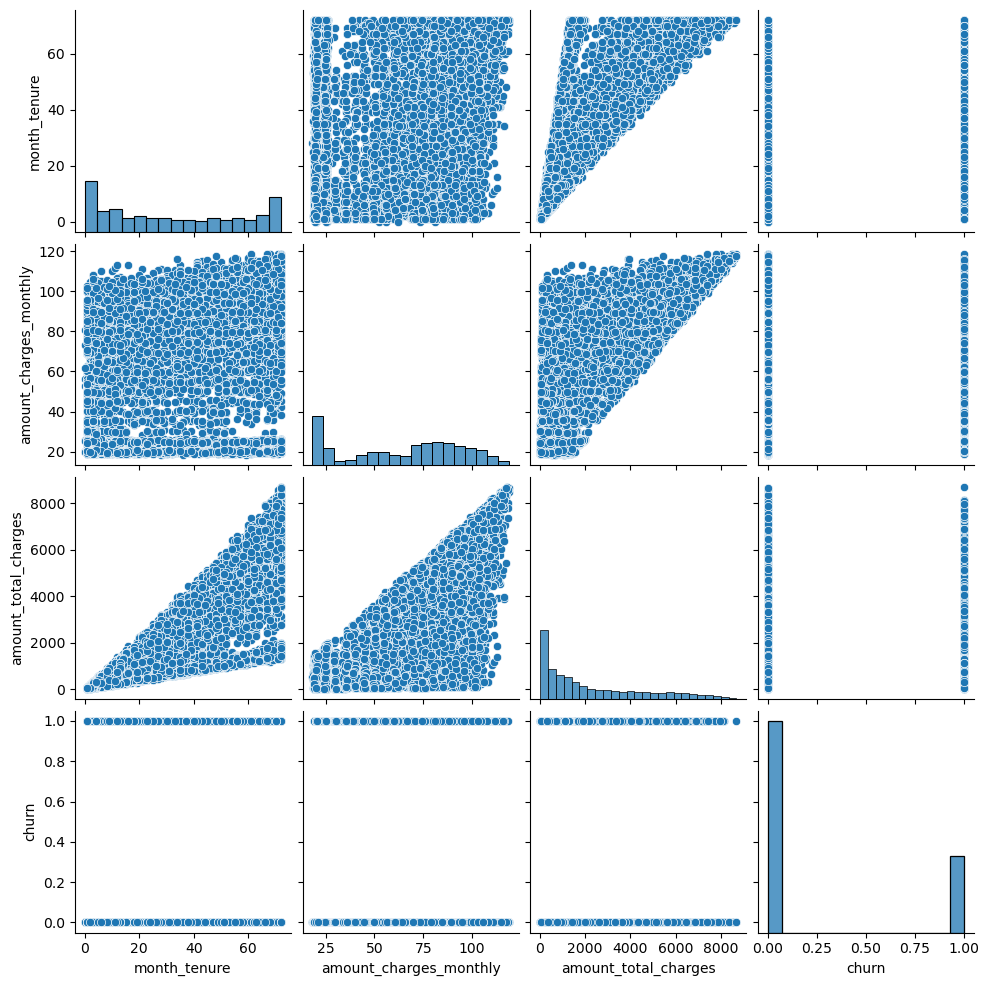

In [127]:
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na option is deprecated.*")

col = num_columns + ["churn"]

sns.pairplot(df_mapped[col])
plt.show()

In [123]:
import plotly.graph_objects as go 
from plotly.subplots import make_subplots 

n_col = len(num_columns)
col_width = [1/n_col for i in range(n_col)]
col_spec = [{"type": "bar"} for i in range(n_col)]

fig = make_subplots(
    rows=1,
    cols=n_col,
    column_widths=col_width,
    specs=[col_spec]
)

for i in range(n_col):
    col = num_columns[i]
    fig.add_trace(go.Box(y=df[col], name=col, boxmean="sd"), row=1, col=i+1)

fig.update_layout(title="Numerical variables distributions", template="plotly_dark")
fig.update_xaxes(tickangle=45)
fig.show()


On our plot we can see that there are no outliers. We can be conforted by the fact that in `amount_total_charges` the maximum value is around  $8685$ and $1.5*(q3-q1)=8885$

### Categorical variables

/var/folders/kh/dhywcjbd5bl8k6pbqgkwmjrh0000gn/T/ipykernel_46285/3262048200.py:17: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



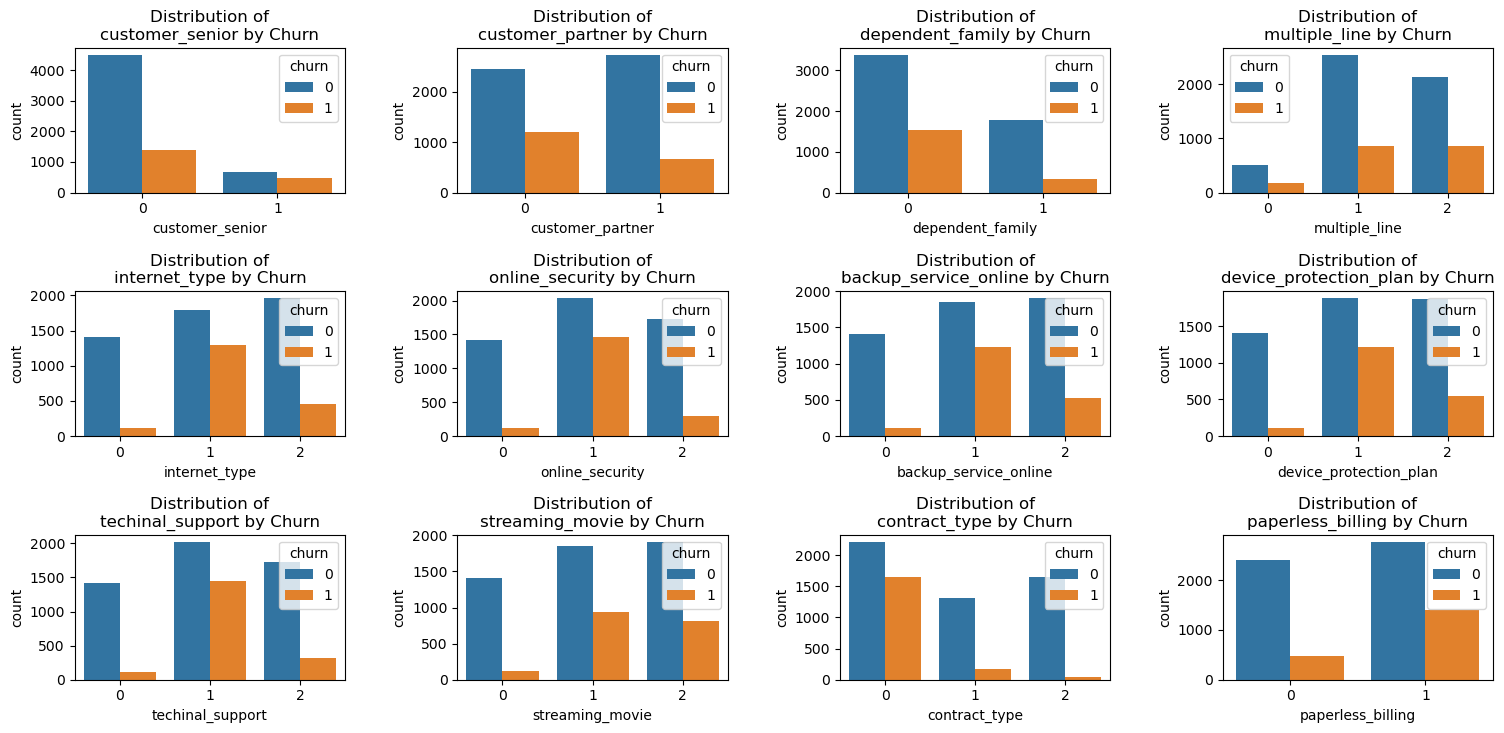

In [159]:
import seaborn as sns 
import matplotlib.pyplot as plt 

n_plots = len(cat_columns)
n_cols = 4
n_rows = (n_plots + n_cols-1) // n_cols

fig, ax = plt.subplots(n_rows, n_cols, figsize=(16,8), squeeze=False)
fig.tight_layout(pad=5.0)

for i, col in enumerate(cat_columns):
    row = i // n_cols
    col_pos = i % n_cols
    sns.countplot(x=col, hue="churn", data=df_mapped, ax=ax[row, col_pos])
    ax[row, col_pos].set_title(f"Distribution of\n{col} by Churn")

fig.show()

# Pipeline steps

#### Drop missing values

In [ ]:
# Drop missing values in amout_total_charges
df.dropna(inplace=True)

#### Drop redondant features


In [125]:
df.drop(columns=["phone_subscription", "streaming_tv"], inplace=True)

In [126]:
import plotly.graph_objects as go 
from plotly.subplots import make_subplots

df_mapped = df.copy()

for col in df_mapped:
    if col in mapping_dict.keys():
        df_mapped[col] = df_mapped[col].map(mapping_dict[col])
    else:
        if df_mapped[col].nunique() == 2:
            df_mapped[col] = df_mapped[col].map(mapping_dict["binary"])
        elif df_mapped[col].nunique() == 3:
            df_mapped[col] = df_mapped[col].map(mapping_dict["multiple"])

cor_matrix = df_mapped.drop(columns='id').corr().round(2)

fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"type": "heatmap"}]])

fig.add_trace(go.Heatmap(z=cor_matrix.values, x=cor_matrix.columns, y=cor_matrix.columns, colorscale='Viridis'), row=1, col=1)

fig.update_layout(title='Correlation Matrix', width=700, height=700, template="plotly_dark")
fig.show()

#### Encode categorical variables

In [144]:
reverse_mapping_dict = {
    1: "Yes",
    0: "No"
}

df["customer_senior"] = df["customer_senior"].map(reverse_mapping_dict)

In [145]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

cat_columns = [col for col in df.select_dtypes(include=np.object_).columns][1:-1] # we drop id and churn columns here

df_encoded = encoder.fit_transform(df[cat_columns])
df_encoded = pd.DataFrame(df_encoded, columns= encoder.get_feature_names_out())
df_encoded

,gender_Female,gender_Male,customer_senior_No,customer_senior_Yes,customer_partner_No,customer_partner_Yes,dependent_family_No,dependent_family_Yes,multiple_line_No,multiple_line_No phone service,...,streaming_movie_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,paperless_billing_No,paperless_billing_Yes,payment_method_type_Bank transfer (automatic),payment_method_type_Credit card (automatic),payment_method_type_Electronic check,payment_method_type_Mailed check
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7039,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7040,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7041,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


#### Scale numerical variables

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df[num_columns])
df_scaled = pd.DataFrame(data=df_scaled, columns=num_columns, index=df["id"])
df_scaled

,month_tenure,amount_charges_monthly,amount_total_charges
id,,,
7590-VHVEG,-1.277445,-1.160323,-0.994194
5575-GNVDE,0.066327,-0.259629,-0.173740
3668-QPYBK,-1.236724,-0.362660,-0.959649
7795-CFOCW,0.514251,-0.746535,-0.195248
9237-HQITU,-1.236724,0.197365,-0.940457
...,...,...,...
6840-RESVB,-0.340876,0.665992,-0.129180
2234-XADUH,1.613701,1.277533,2.241056
4801-JZAZL,-0.870241,-1.168632,-0.854514


In [122]:
import plotly.graph_objects as go 
from plotly.subplots import make_subplots 

n_col = len(num_columns)
col_width = [1/n_col for i in range(n_col)]
col_spec = [{"type": "bar"} for i in range(n_col)]

fig = make_subplots(
    rows=1,
    cols=n_col,
    column_widths=col_width,
    specs=[col_spec]
)

for i in range(n_col):
    col = num_columns[i]
    fig.add_trace(go.Box(y=df_scaled[col], name=col, boxmean="sd"), row=1, col=i+1)

fig.update_layout(title="Scaled numerical variables distributions", template="plotly_dark")
fig.update_xaxes(tickangle=45)
fig.show()
